# Global Internet Users (1990-2010)

<a id='intro'></a>
## Introduction

This analysis will look at data taken from the World Bank on the number of internet users per country from years 1990 to 2010. I'm curious to explore the trends in internet usage over time as well as which countries are leading in internet usage and which are catching up. 

Based upon the dataset, there are a few questions I'm looking to answer: 

1. What is the overall growth trend of global internet users from 1990 to 2010?

2. What are the countries that have recorded internet usage across all years of the dataset? (Group A)

2. Which of these countries have the highest average internet users?

3. Among of the countries that don't have data across all years, what are the top 20 countries with the most average internet users? 
(Group B)

4. What is the growth trend like for both groups of countries? 

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import csv
import pprint as pp

sns.set(color_codes = True)

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [3]:
#Import dataset and explore for cleaniness issues 
#There appear to be a lot of NaN values as well as a lot of exponents 
internet_users = pd.read_excel('internet_user_total.csv')
internet_users.info()
internet_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 23 columns):
Internet users, total number    213 non-null object
1990                            204 non-null float64
1991                            39 non-null float64
1992                            50 non-null float64
1993                            65 non-null float64
1994                            91 non-null float64
1995                            138 non-null float64
1996                            171 non-null float64
1997                            181 non-null float64
1998                            187 non-null float64
1999                            194 non-null float64
2000                            195 non-null float64
2001                            196 non-null float64
2002                            198 non-null float64
2003                            193 non-null float64
2004                            196 non-null float64
2005                            198 non-null float64

,"Internet users, total number",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1123.920517,22569.277533,2.824412e+04,3.380450e+05,5.988651e+05,5.537710e+05,5.490559e+05,1.085510e+06,1256469.72,NaN
1,Albania,0.0,NaN,NaN,NaN,NaN,350.820117,1002.157509,1502.476346,2002.216783,...,12052.645369,30194.039918,7.563375e+04,1.898870e+05,3.033497e+05,4.765945e+05,7.590813e+05,1.315402e+06,1441927.80,NaN
2,Algeria,0.0,NaN,NaN,NaN,100.090832,500.465235,500.469039,3002.798156,6005.526744,...,500441.425787,700615.293472,1.501387e+06,1.921982e+06,2.462986e+06,3.204578e+06,3.504773e+06,3.924904e+06,4433526.00,NaN
3,American Samoa,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,0.0,NaN,NaN,NaN,NaN,NaN,995.756049,1979.716334,4424.113974,...,7774.565416,9780.916489,2.020683e+04,2.929038e+04,3.908782e+04,5.768109e+04,5.783693e+04,6.571155e+04,68739.84,NaN


In [4]:
internet_users.shape

(213, 23)

In [5]:
#Remove exponents 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
#Drop 2011 column since it's all null
internet_users = internet_users.drop(['2011'], axis=1)

In [7]:
#Rename index column to "Countries"
internet_users = internet_users.rename(index=str, columns={"Internet users, total number": "Countries"})

In [8]:
#Set Countries as index  
internet_users.set_index('Countries')

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Countries,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1118.181,1123.921,22569.278,28244.119,338045.041,598865.063,553770.979,549055.890,1085510.338,1256469.720
Albania,0.000,nan,nan,nan,nan,350.820,1002.158,1502.476,2002.217,2502.336,...,10026.048,12052.645,30194.040,75633.754,189886.963,303349.659,476594.487,759081.324,1315401.876,1441927.800
Algeria,0.000,nan,nan,nan,100.091,500.465,500.469,3002.798,6005.527,60054.701,...,200180.427,500441.426,700615.293,1501386.774,1921981.915,2462985.504,3204577.873,3504773.250,3924903.866,4433526.000
American Samoa,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Andorra,0.000,nan,nan,nan,nan,nan,995.756,1979.716,4424.114,4885.694,...,nan,7774.565,9780.916,20206.833,29290.379,39087.817,57681.093,57836.931,65711.548,68739.840
Angola,0.000,nan,nan,nan,nan,nan,96.624,725.799,2424.499,9723.482,...,19570.007,40260.379,57158.963,74172.607,188529.996,324497.823,560811.744,829746.344,1113306.900,1908191.200
Antigua and Barbuda,0.000,nan,nan,nan,nan,1510.652,2013.778,2517.194,3020.806,4027.723,...,7045.119,10063.375,14078.563,20101.919,29132.617,53212.972,60206.061,65186.814,65149.084,70968.000
Argentina,0.000,nan,1003.811,10033.898,15043.742,30072.015,50091.717,100123.190,300194.566,1200183.504,...,3648448.079,4097918.576,4527353.730,6148589.451,6854529.687,8166599.958,10214687.581,11164731.064,13621239.800,14548455.360
Armenia,0.000,nan,nan,nan,299.999,1700.002,3000.027,3500.074,4000.153,30001.854,...,50006.263,60009.312,140026.994,150037.624,161054.053,172887.099,185104.228,191211.303,472001.787,1360511.680


In [9]:
#Switch countries and years
internet_users = internet_users.transpose()
internet_users.head()

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
Countries,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1990,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.811,NaN,NaN,...,NaN,NaN,NaN,2493.176,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10033.898,NaN,NaN,...,NaN,NaN,NaN,8776.400,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#Remove index rows and replace with first row (country names)
new_header = internet_users.iloc[0]

In [105]:
new_header.head()

Countries
Afghanistan   0.000
Albania       0.000
Algeria       0.000
Andorra       0.000
Angola        0.000
Name: 1990, dtype: float64

In [12]:
#Replace columns with new headers 
internet_users.columns = new_header

In [13]:
#Establish Countries column as index column
internet_users = internet_users.iloc[1:]

In [14]:
#View changes to dataset
internet_users.head()

Countries,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1990,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.811,NaN,NaN,...,NaN,NaN,NaN,2493.176,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10033.898,NaN,NaN,...,NaN,NaN,NaN,8776.400,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,100.091,NaN,NaN,NaN,NaN,15043.742,299.999,NaN,...,1999.394,NaN,NaN,11968.364,NaN,999.530,NaN,NaN,589.020,199.493


In [15]:
#set nulls to 0
internet_users = internet_users.fillna(0)

In [16]:
#Explore changes in dataset
internet_users.head()

Countries,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1990,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1991,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1992,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1003.811,0.000,0.000,...,0.000,0.000,0.000,2493.176,0.000,0.000,0.000,0.000,0.000,0.000
1993,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10033.898,0.000,0.000,...,0.000,0.000,0.000,8776.400,0.000,0.000,0.000,0.000,0.000,0.000
1994,0.000,0.000,100.091,0.000,0.000,0.000,0.000,15043.742,299.999,0.000,...,1999.394,0.000,0.000,11968.364,0.000,999.530,0.000,0.000,589.020,199.493


In [17]:
#make sure there are no null values in the dataset
internet_users.isnull().sum().value_counts()

0    213
dtype: int64

In [18]:
#explore descriptive stats about the dataset
internet_users.describe()

Countries,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
count,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,...,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000
mean,211179.644,220238.739,1075032.045,0.000,17866.994,244945.019,19679.453,4157082.633,144064.580,14513.299,...,478206.927,894872.305,6061.069,2298166.669,5846016.733,14895.279,296854.685,422554.735,221416.738,485526.713
std,380976.591,431807.795,1519313.155,0.000,24552.531,488651.480,25998.982,4866540.083,301276.117,15429.217,...,517179.135,1564377.048,6822.893,3176712.946,8688469.820,13153.689,467166.824,845124.544,357546.261,596583.710
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,350.820,500.465,0.000,0.000,0.000,1510.652,30072.015,1700.002,0.000,...,9996.688,350.000,0.000,26929.931,0.000,999.530,0.000,0.000,783.451,897.798
50%,0.000,3504.906,150136.561,0.000,4885.694,14629.037,5033.837,2599435.568,40003.732,13940.391,...,349798.282,120000.000,3901.983,818005.004,200240.882,11995.570,35545.796,14621.697,19492.292,50217.236
75%,338045.041,189886.963,1921981.915,0.000,29290.379,188529.996,29132.617,6854529.687,161054.053,25652.984,...,667435.924,867554.353,10732.364,3347146.677,10594671.070,29906.226,569070.899,216521.244,326878.253,1007663.435
max,1256469.720,1441927.800,4433526.000,0.000,68739.840,1908191.200,70968.000,14548455.360,1360511.680,45144.960,...,1606910.922,5488940.400,19172.080,10337114.992,24211031.442,29950.510,1512273.485,2970485.479,1308857.000,1445717.210


In [19]:
#Order countries by most values per year to least 
(internet_users == 0).sum().sort_values()

Countries
France                       0
Finland                      0
Spain                        0
Denmark                      0
Sweden                       0
Switzerland                  0
Israel                       0
Italy                        0
Canada                       0
Japan                        0
Korea, Rep.                  0
United Kingdom               0
United States                0
Belgium                      0
Germany                      0
Netherlands                  0
Austria                      0
Norway                       0
Thailand                     1
Hong Kong, China             1
Hungary                      1
Iceland                      1
South Africa                 1
Ireland                      1
Singapore                    1
Brazil                       1
Mexico                       1
Greece                       1
Poland                       1
Portugal                     1
                            ..
Kyrgyzstan                   

In [20]:
#drop columns with all zero values 
zero_countries = internet_users.loc[:, (internet_users == 0).all()]
zero_countries
iu_wdata = internet_users.drop(zero_countries, axis =1)
iu_wdata

Countries,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1990,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100028.687,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1991,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,190042.659,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1992,0.000,0.000,0.000,0.000,0.000,0.000,1003.811,0.000,0.000,310055.097,...,0.000,0.000,0.000,2493.176,0.000,0.000,0.000,0.000,0.000,0.000
1993,0.000,0.000,0.000,0.000,0.000,0.000,10033.898,0.000,0.000,350047.450,...,0.000,0.000,0.000,8776.400,0.000,0.000,0.000,0.000,0.000,0.000
1994,0.000,0.000,100.091,0.000,0.000,0.000,15043.742,299.999,0.000,400033.124,...,1999.394,0.000,0.000,11968.364,0.000,999.530,0.000,0.000,589.020,199.493
1995,0.000,350.820,500.465,0.000,0.000,1510.652,30072.015,1700.002,0.000,500005.685,...,9996.688,350.000,0.000,26929.931,0.000,2998.599,0.000,0.000,783.451,897.798
1996,0.000,1002.158,500.469,995.756,96.624,2013.778,50091.717,3000.027,2299.668,600013.887,...,59977.886,1000.456,97.651,55856.764,101.268,4997.862,0.000,97.573,830.912,1996.605
1997,0.000,1502.476,3002.798,1979.716,725.799,2517.194,100123.190,3500.074,0.000,3032448.684,...,109954.428,2502.703,244.025,89772.943,3030.716,7497.499,0.000,2438.145,878.678,3998.260
1998,0.000,2002.217,6005.527,4424.114,2424.499,3020.806,300194.566,4000.153,0.000,5772822.817,...,229892.818,5007.512,487.903,324190.587,10073.137,9997.042,0.000,3898.911,2926.517,10011.525
1999,0.000,2502.336,60054.701,4885.694,9723.482,4027.723,1200183.504,30001.854,3985.355,7727668.143,...,329828.269,7509.265,975.610,678326.831,100422.137,11995.570,0.000,9744.942,14624.607,20056.231


# Data Exploration


In [21]:
#Create variable for countries with data across all years (Group A) 
full_countries = internet_users.loc[:, (internet_users != 0).all()]
full_countries.head()

Countries,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Israel,Italy,Japan,"Korea, Rep.",Netherlands,Norway,Spain,Sweden,Switzerland,United Kingdom,United States
1990,10000.000,100.161,100000.000,5001.057,20000.000,29929.407,99578.349,4984.767,9970.984,24809.268,9999.422,49795.964,30000.000,5006.421,50000.000,39756.406,49979.886,1988024.101
1991,20000.000,2002.512,160003.091,10003.687,69999.972,79803.350,199348.126,9963.546,19935.585,49618.696,20005.342,79696.202,59996.299,10012.279,99998.816,79530.260,99955.634,2975534.953
1992,49999.994,10008.574,260011.862,20011.344,94999.981,159587.317,349460.024,14931.415,39857.008,119085.625,43031.511,199356.971,94985.017,30036.071,129995.117,119374.025,149920.067,4453199.953
1993,60000.000,20008.596,340021.535,30023.249,129999.949,339087.812,375201.885,19886.476,69726.856,496193.325,110119.562,299245.425,119972.438,50058.630,149991.247,149352.355,299807.241,5924597.893
1994,110000.000,69999.868,690036.061,70066.274,250000.000,518583.735,751826.613,29796.539,109546.705,992389.405,138137.135,499023.361,179964.330,110119.436,299985.188,189345.703,599560.187,12811918.538


In [22]:
#Create variable for countries with sporadic data 
internet_users = iu_wdata 
mixed_data = internet_users.drop(full_countries, axis =1 )
mixed_data

Countries,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1990,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100028.687,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1991,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,190042.659,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1992,0.000,0.000,0.000,0.000,0.000,0.000,1003.811,0.000,0.000,310055.097,...,0.000,0.000,0.000,2493.176,0.000,0.000,0.000,0.000,0.000,0.000
1993,0.000,0.000,0.000,0.000,0.000,0.000,10033.898,0.000,0.000,350047.450,...,0.000,0.000,0.000,8776.400,0.000,0.000,0.000,0.000,0.000,0.000
1994,0.000,0.000,100.091,0.000,0.000,0.000,15043.742,299.999,0.000,400033.124,...,1999.394,0.000,0.000,11968.364,0.000,999.530,0.000,0.000,589.020,199.493
1995,0.000,350.820,500.465,0.000,0.000,1510.652,30072.015,1700.002,0.000,500005.685,...,9996.688,350.000,0.000,26929.931,0.000,2998.599,0.000,0.000,783.451,897.798
1996,0.000,1002.158,500.469,995.756,96.624,2013.778,50091.717,3000.027,2299.668,600013.887,...,59977.886,1000.456,97.651,55856.764,101.268,4997.862,0.000,97.573,830.912,1996.605
1997,0.000,1502.476,3002.798,1979.716,725.799,2517.194,100123.190,3500.074,0.000,3032448.684,...,109954.428,2502.703,244.025,89772.943,3030.716,7497.499,0.000,2438.145,878.678,3998.260
1998,0.000,2002.217,6005.527,4424.114,2424.499,3020.806,300194.566,4000.153,0.000,5772822.817,...,229892.818,5007.512,487.903,324190.587,10073.137,9997.042,0.000,3898.911,2926.517,10011.525
1999,0.000,2502.336,60054.701,4885.694,9723.482,4027.723,1200183.504,30001.854,3985.355,7727668.143,...,329828.269,7509.265,975.610,678326.831,100422.137,11995.570,0.000,9744.942,14624.607,20056.231


In [23]:
#Set attributes for plots 
sns.set_style('ticks')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.spines.top': False,
         'axes.spines.right': False}

mpl.rcParams.update(params)

Text(0,0.5,'Internet Users (Millions)')

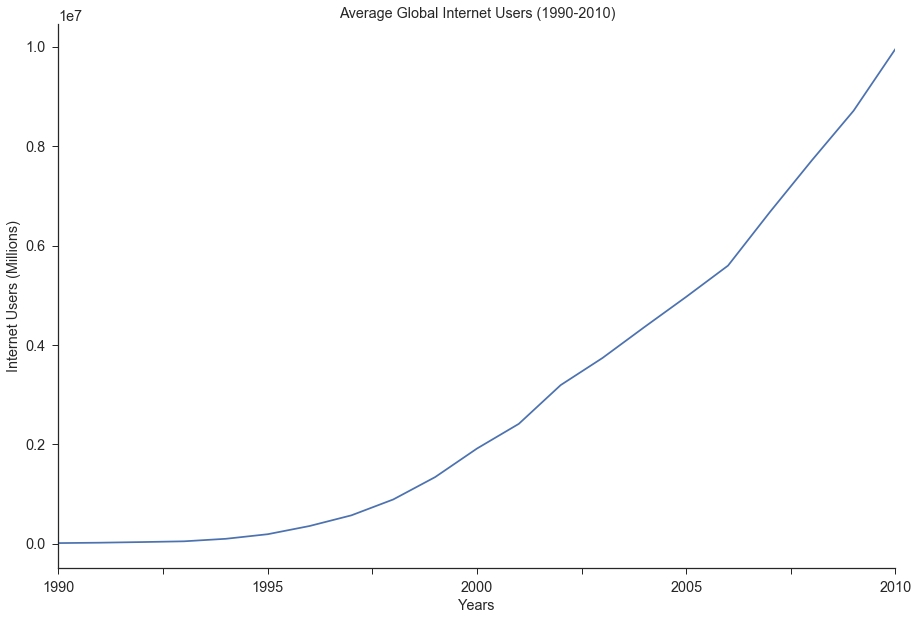

In [279]:
#Average global internet users across years 
avg_usersplt = iu_wdata.mean(axis = 1).plot(title = 'Average Global Internet Users (1990-2010)')
avg_usersplt.set_xlabel('Years')
avg_usersplt.set_ylabel('Internet Users (Millions)')


As anticipated, internet users over time has continued to increase. It is interesting to note here that internet usage globally sees an uptick around 2000 and 2007. 

Text(0,0.5,'Total Internet Users (Millions)')

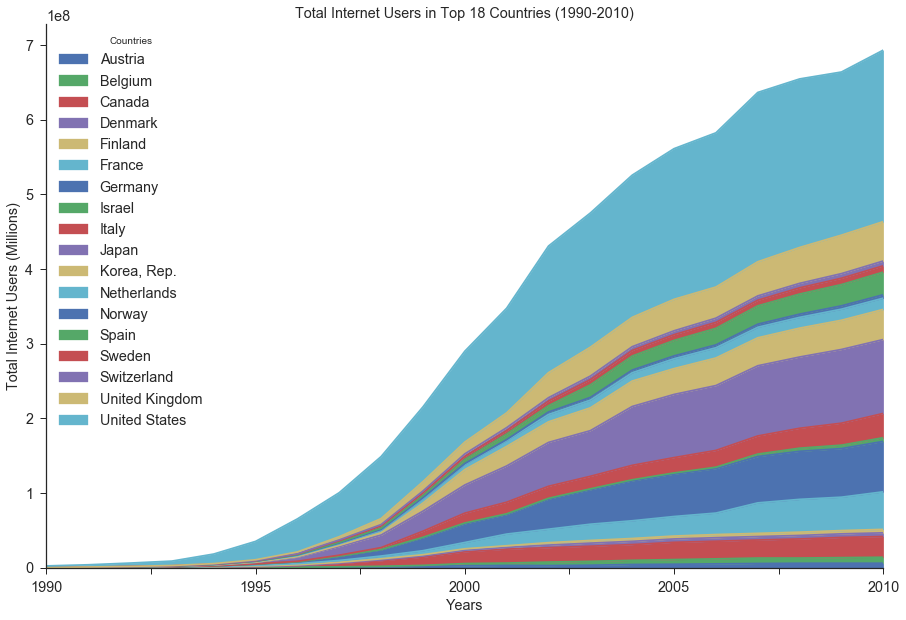

In [291]:
#Create area plot of the 18 countries with the most data on internet users across years (Group A)

fc_area = full_countries.plot(kind = 'area', title="Total Internet Users in Top 18 Countries (1990-2010)")
fc_area.set_xlabel('Years')
fc_area.set_ylabel('Total Internet Users (Millions)')


Of all the countries in the dataset, these 18 countries had the highest total number of internet users. At the top is the United States followed by the UK. 

In [286]:
#Averages of Group A 
fc_mean = full_countries.mean().sort_values(ascending = False)
fc_mean

Countries
United States    116640655.137
Japan             43220974.254
Germany           28693080.658
United Kingdom    21824916.859
Korea, Rep.       18230138.189
France            16062657.783
Canada            13048703.419
Italy             11908099.884
Spain             10319323.070
Netherlands        7002224.522
Sweden             4219897.994
Belgium            3219565.444
Switzerland        3011508.206
Austria            2649087.660
Denmark            2315771.611
Finland            2228570.584
Norway             2029055.730
Israel             1366100.721
dtype: float64

Text(0.5,0,'Average Internet Users (Millions)')

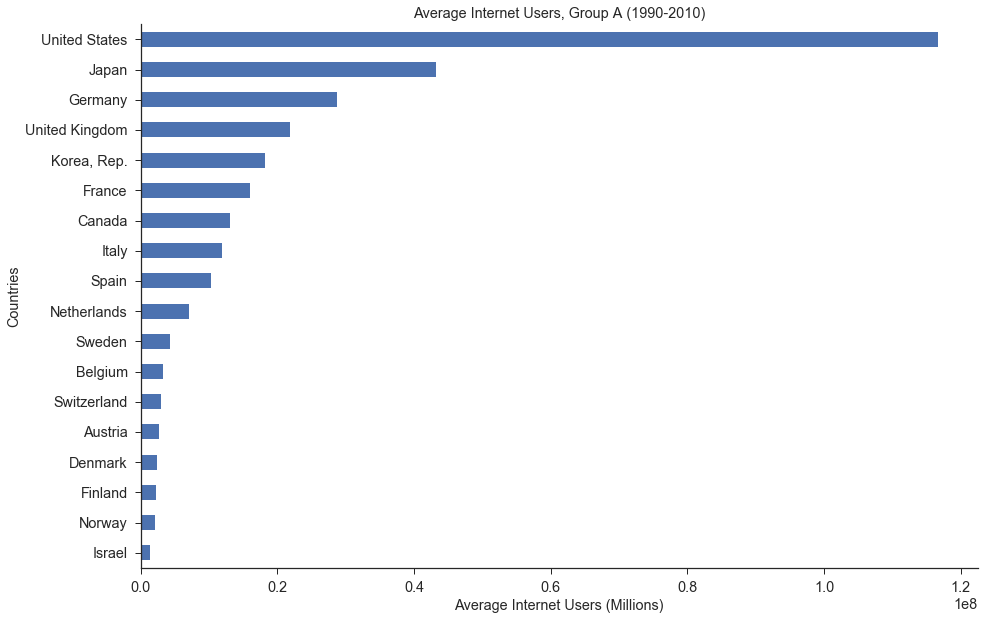

In [292]:
#average internet users per country of Group A (1990-2010)
fcMeanPlt = fc_mean.sort_values(axis=0).plot(kind = 'barh', title='Average Internet Users, Group A (1990-2010)')
fcMeanPlt.set_xlabel('Average Internet Users (Millions)')

Looking at the average however, we see that the U.S. still has the highest total number of internet users but is followed by Japan and Germany, not the U.K. This is a better reflection of the actual order of countries with internet users. 

Text(0,0.5,'Year')

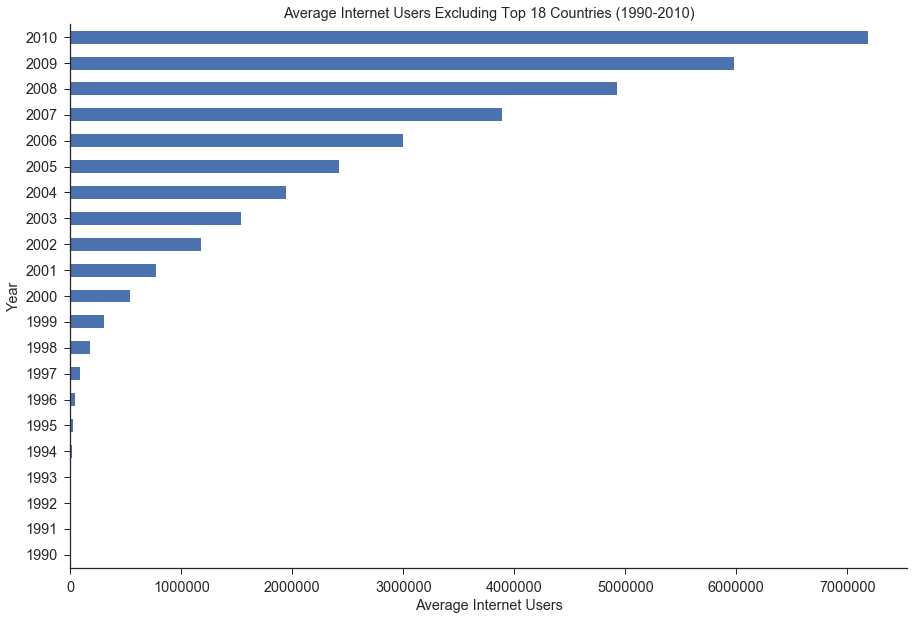

In [121]:
#Average internet users of remaining countries
md_avpyear = mixed_data.mean(axis=1)
md_avpyear_plt = md_avpyear.plot(kind ='barh', title='Average Internet Users Excluding Top 18 Countries (1990-2010)')
md_avpyear_plt.set_xlabel('Average Internet Users')
md_avpyear_plt.set_ylabel('Year')

This plot removes the top 18 countries from the dataset to get an idea of internet usage in the remaining countries. 

In [61]:
#Countries with the most internet users among countries with mixed data (Group B)
mixed_data.max().sort_values(ascending = False).head(20)

Countries
China         460077957.136
India          91846074.525
Brazil         79245740.055
Russia         61472010.520
Nigeria        45039710.643
Mexico         35217856.094
Pakistan       29128969.667
Turkey         28969975.815
Vietnam        24211031.442
Poland         23854014.512
Indonesia      23747222.763
Philippines    23315199.500
Egypt          21691775.990
Ukraine        20451748.050
Australia      16923971.840
Colombia       16897616.965
Malaysia       15989772.571
Morocco        15656191.880
Thailand       14653913.608
Argentina      14548455.360
dtype: float64

In [63]:
#Filtered DataFrame of Group B
top_md = mixed_data.filter(items=['China', 'India', 'Brazil', 'Russia', 'Nigeria',
                        'Mexico', 'Pakistan', 'Turkey', 'Vietnam', 'Poland',
                        'Indonesia', 'Philippines', 'Egypt', 'Ukraine',
                        'Australia', 'Colombia', 'Malaysia', 'Morocco',
                        'Thailand', 'Argentina'])
top_md

Countries,China,India,Brazil,Russia,Nigeria,Mexico,Pakistan,Turkey,Vietnam,Poland,Indonesia,Philippines,Egypt,Ukraine,Australia,Colombia,Malaysia,Morocco,Thailand,Argentina
1990,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100028.687,0.000,0.000,0.000,0.000,0.000
1991,0.000,0.000,5002.849,0.000,0.000,5052.916,0.000,0.000,0.000,1995.602,0.000,0.000,0.000,0.000,190042.659,0.000,0.000,0.000,30.145,0.000
1992,0.000,1012.972,20012.605,1001.385,0.000,15148.371,0.000,0.000,0.000,19937.456,0.000,0.000,0.000,0.000,310055.097,0.000,201.225,0.000,200.137,1003.811
1993,2005.081,2025.163,40028.643,20029.064,0.000,25222.538,0.000,4817.523,0.000,49796.502,0.000,0.000,585.674,400.502,350047.450,0.000,5031.403,0.000,7968.112,10033.898
1994,14035.160,10122.053,60049.755,80116.118,0.000,39304.867,0.000,28879.878,0.000,149275.713,2082.275,3956.738,3895.842,7008.522,400033.124,38366.091,20126.123,0.000,22831.370,15043.742
1995,60149.510,252973.905,170164.192,220298.499,0.000,94638.797,156.257,48087.241,0.000,248683.638,52062.386,19797.138,19438.161,22025.275,500005.685,68549.330,30184.799,999.184,44633.431,30072.015
1996,160399.126,455255.996,740838.315,400467.012,9947.553,188098.074,3911.308,115291.869,101.268,497343.195,114526.003,39627.366,38798.213,50052.535,600013.887,122478.245,181034.757,1550.739,69581.330,50091.717
1997,400999.741,708073.474,1311723.746,700645.085,19869.330,598714.571,36986.492,287927.322,3030.716,795985.066,399689.746,99162.130,58087.944,100092.579,3032448.684,207959.614,502584.834,5994.822,219679.694,100123.190
1998,2105102.278,1415953.222,2503663.726,1200823.538,29768.928,1227834.247,60563.571,431460.972,10073.137,1573894.906,530627.513,816971.045,96649.373,150116.766,5772822.817,432910.837,1507160.455,39961.875,672849.806,300194.566
1999,8919464.192,2831310.292,3505320.092,1500829.066,49568.379,1829828.961,78198.226,1436988.539,100422.137,2091784.833,935987.851,1083292.469,193021.614,200123.010,7727668.143,663857.781,2813985.080,49947.067,1514184.881,1200183.504


Text(0,0.5,'Population')

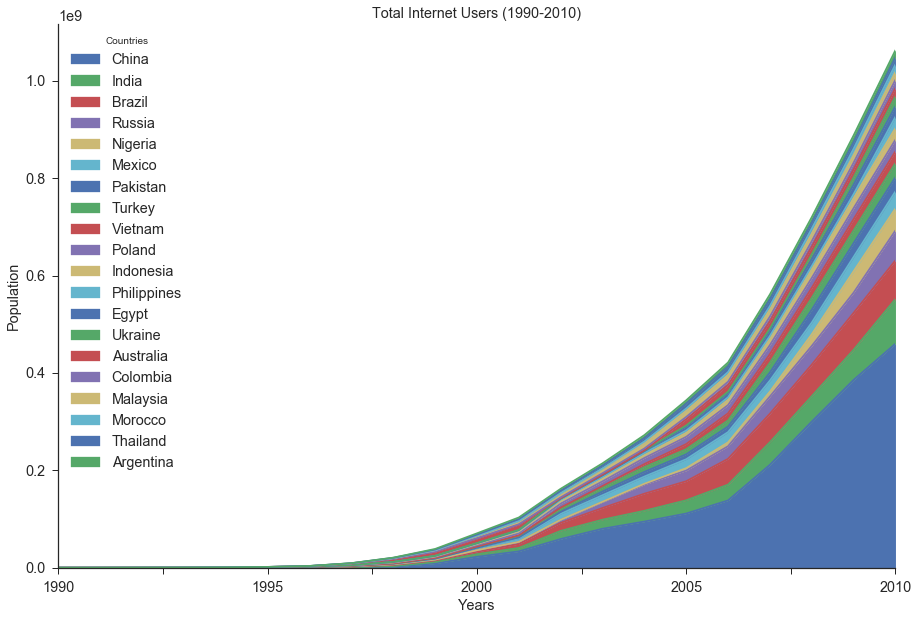

In [276]:
#Area plot of Group B
#Seems to be an uptick in internet users across most countries around 2006/2007
#China and India have also overtaken the U.S.A. in internet users
top_md_plt = top_md.plot(kind='area', title = "Total Internet Users (1990-2010)")
top_md_plt.set_xlabel('Years')
top_md_plt.set_ylabel('Population')

This plot looks at the next 20 countries with the most internet users between 1990-2010. It's interesting to note here that a lot of these countries also saw up uptick around 2000 and 2007. Compared to the first group, the growth of internet users in this group is more exponential. 

In [67]:
#Averages of countries in Group B
top_md_mean = top_md.mean()
top_md_mean

Countries
China         90925729.087
India         18466388.358
Brazil        22254642.538
Russia        12971084.854
Nigeria        6615788.888
Mexico         9882391.203
Pakistan       6916648.976
Turkey         7437925.601
Vietnam        5846016.733
Poland         7576920.409
Indonesia      5703590.345
Philippines    3312793.503
Egypt          4554216.922
Ukraine        2778210.590
Australia      6094031.963
Colombia       3601395.832
Malaysia       6305588.320
Morocco        2966557.668
Thailand       4879445.881
Argentina      4157082.633
dtype: float64

Text(0.5,0,'Average Internet Users (Millions)')

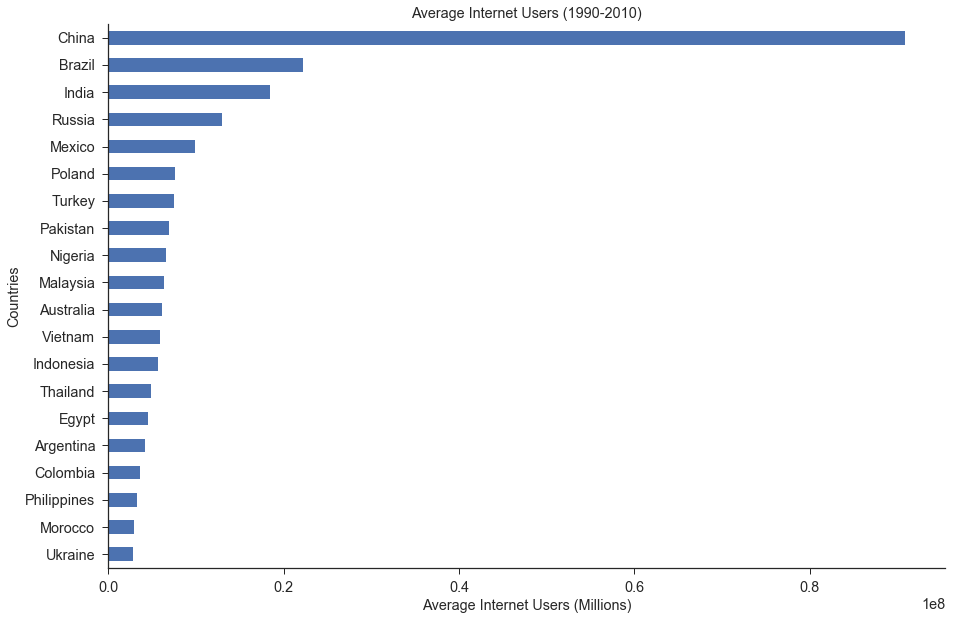

In [275]:
#horizontal bar plot of average internet users from Group B countries 
top_md_mean_plt = top_md_mean.sort_values(axis=0).plot(kind = 'barh', title='Average Internet Users (1990-2010)')
top_md_mean_plt.set_xlabel('Average Internet Users (Millions)')

Of the countries in the second group, China has the most internet users total followed by Brazil and India. 

# Global Population

Looking at the area plots for these two groups, I noticed the population of internet users steadying for the top 18 countries whereas the population of internet users was growing exponentially for the second group. I wondered whether this could be correlated with the general population growth trends for both groups. 

For this exploration, I analyzed a dataset on total population numbers gathered from Gapminder's collection of datasets. 

In [248]:
#Import dataset on global population
global_pop = pd.read_excel('global_population.xls')
global_pop.head()

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Afghanistan,3280000.000,3280000.000,3323519.000,3448982.000,3625022.000,3810047.000,3973968.000,4169690.000,4419695.000,...,25183615.000,25877544.000,26528741.000,27207291.000,27962207.000,28809167.000,29726803.000,30682500.000,31627506.000,32526562.000
2,Akrotiri and Dhekelia,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,15700.000,15700.000,15700.000,nan,nan,nan,nan,nan,nan,nan
3,Albania,410445.000,423591.000,438671.000,457234.000,478227.000,506889.000,552800.000,610036.000,672544.000,...,3050741.000,3010849.000,2968026.000,2929886.000,2901883.000,2886010.000,2880667.000,2883281.000,2889676.000,2896679.000
4,Algeria,2503218.000,2595056.000,2713079.000,2880355.000,3082721.000,3299305.000,3536468.000,3811028.000,4143163.000,...,33749328.000,34261971.000,34811059.000,35401790.000,36036159.000,36717132.000,37439427.000,38186135.000,38934334.000,39666519.000


In [249]:
#Rename index column to "Countries"
global_pop = global_pop.rename(index=str, columns= {"Total population": "Countries"})

In [250]:
#Set Countries as index  
global_pop.set_index('Countries')

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Countries,,,,,,,,,,,,,,,,,,,,,
Abkhazia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Afghanistan,3280000.000,3280000.000,3323519.000,3448982.000,3625022.000,3810047.000,3973968.000,4169690.000,4419695.000,4710171.000,...,25183615.000,25877544.000,26528741.000,27207291.000,27962207.000,28809167.000,29726803.000,30682500.000,31627506.000,32526562.000
Akrotiri and Dhekelia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,15700.000,15700.000,15700.000,nan,nan,nan,nan,nan,nan,nan
Albania,410445.000,423591.000,438671.000,457234.000,478227.000,506889.000,552800.000,610036.000,672544.000,741688.000,...,3050741.000,3010849.000,2968026.000,2929886.000,2901883.000,2886010.000,2880667.000,2883281.000,2889676.000,2896679.000
Algeria,2503218.000,2595056.000,2713079.000,2880355.000,3082721.000,3299305.000,3536468.000,3811028.000,4143163.000,4525691.000,...,33749328.000,34261971.000,34811059.000,35401790.000,36036159.000,36717132.000,37439427.000,38186135.000,38934334.000,39666519.000
American Samoa,8170.000,8156.000,8142.000,8128.000,8114.000,7958.000,7564.000,7057.000,6582.000,6139.000,...,58648.000,57904.000,57031.000,56226.000,55636.000,55316.000,55227.000,55302.000,55434.000,55538.000
Andorra,2654.000,2654.000,2700.000,2835.000,3026.000,3230.000,3436.000,3654.000,3885.000,4131.000,...,83373.000,84878.000,85616.000,85474.000,84419.000,82326.000,79316.000,75902.000,72786.000,70473.000
Angola,1567028.000,1567028.000,1597530.000,1686390.000,1813100.000,1949329.000,2110747.000,2285417.000,2473597.000,2677047.000,...,18541467.000,19183907.000,19842251.000,20520103.000,21219954.000,21942296.000,22685632.000,23448202.000,24227524.000,25021974.000
Anguilla,2025.000,2025.000,2064.000,2177.000,2338.000,2511.000,2693.000,2888.000,3097.000,3320.000,...,12903.000,13145.000,13365.000,13571.000,13768.000,13956.000,14133.000,14300.000,14460.000,14614.000


In [251]:
#Switch countries and years
global_pop = global_pop.transpose()
global_pop.head()

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
Countries,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,British Indian Ocean Territory,Clipperton,French Southern and Antarctic Lands,Gaza Strip,Heard and McDonald Islands,Northern Marianas,South Georgia and the South Sandwich Islands,US Minor Outlying Islands,Virgin Islands,West Bank
1800,NaN,3280000.000,NaN,410445.000,2503218.000,8170.000,2654.000,1567028.000,2025.000,37000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,NaN,3280000.000,NaN,423591.000,2595056.000,8156.000,2654.000,1567028.000,2025.000,37000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,NaN,3323519.000,NaN,438671.000,2713079.000,8142.000,2700.000,1597530.000,2064.000,37000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1830,NaN,3448982.000,NaN,457234.000,2880355.000,8128.000,2835.000,1686390.000,2177.000,37000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
#Remove index rows and replace with first row (country names)
new_header = global_pop.iloc[0]
new_header.head()

0                 Abkhazia
1              Afghanistan
2    Akrotiri and Dhekelia
3                  Albania
4                  Algeria
Name: Countries, dtype: object

In [282]:
#Replace columns with new headers 
global_pop.columns = new_header

In [259]:
#Establish Countries column as index column
global_pop= global_pop.iloc[1:]
global_pop.head()

Countries,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,British Indian Ocean Territory,Clipperton,French Southern and Antarctic Lands,Gaza Strip,Heard and McDonald Islands,Northern Marianas,South Georgia and the South Sandwich Islands,US Minor Outlying Islands,Virgin Islands,West Bank
1800,NaN,3280000.000,NaN,410445.000,2503218.000,8170.000,2654.000,1567028.000,2025.000,37000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,NaN,3280000.000,NaN,423591.000,2595056.000,8156.000,2654.000,1567028.000,2025.000,37000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,NaN,3323519.000,NaN,438671.000,2713079.000,8142.000,2700.000,1597530.000,2064.000,37000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1830,NaN,3448982.000,NaN,457234.000,2880355.000,8128.000,2835.000,1686390.000,2177.000,37000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1840,NaN,3625022.000,NaN,478227.000,3082721.000,8114.000,3026.000,1813100.000,2338.000,37000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
#Set nulls to 0
global_pop = global_pop.fillna(0)

In [266]:
#Filtered DatFrame of countries from Group A of the internet usage dataset
fc_gpop = global_pop.filter(items=['United States', 'United Kingdom', 'Switzerland',
                        'Sweden', 'Spain', 'Norway', 'Netherlands', 
                        'Korea, Rep.', 'Japan', 'Italy', 'Israel',
                        'Germany', 'France', 'Finland', 'Denmark',
                        'Canada', 'Belgium', 'Austria'])
fc_gpop.head()

Countries,United States,United Kingdom,Switzerland,Sweden,Spain,Norway,Netherlands,Japan,Italy,Israel,Germany,France,Finland,Denmark,Canada,Belgium,Austria
1800,6801854.000,12327466.000,1826051.000,2354189.000,11549294.000,868570.000,2254522.000,30294378.000,18822234.000,209954.000,22886919.000,29355111.000,977662.000,1062514.000,645526.000,3138137.000,3205587.000
1810,8294928.000,14106058.000,1904962.000,2428185.000,11873298.000,918398.000,2293548.000,30645903.000,19491674.000,209954.000,23882461.000,30293172.000,1070625.000,1108146.000,727603.000,3283959.000,3286650.000
1820,10361646.000,16221883.000,1994147.000,2591521.000,12333192.000,995904.000,2407847.000,30993147.000,20341608.000,209954.000,25507768.000,31549988.000,1190807.000,1177749.000,879432.000,3475782.000,3391206.000
1830,13480460.000,18533999.000,2101048.000,2855774.000,13051762.000,1115667.000,2619333.000,31330455.000,21529667.000,209954.000,28016571.000,33174810.000,1327905.000,1264714.000,1202146.000,3751571.000,3538286.000
1840,17942443.000,20737251.000,2229381.000,3132892.000,13948048.000,1252476.000,2880190.000,31663783.000,22956667.000,209954.000,31016143.000,34854476.000,1467238.000,1368238.000,1745604.000,4087429.000,3728381.000


Text(0,0.5,'Population(Millions)')

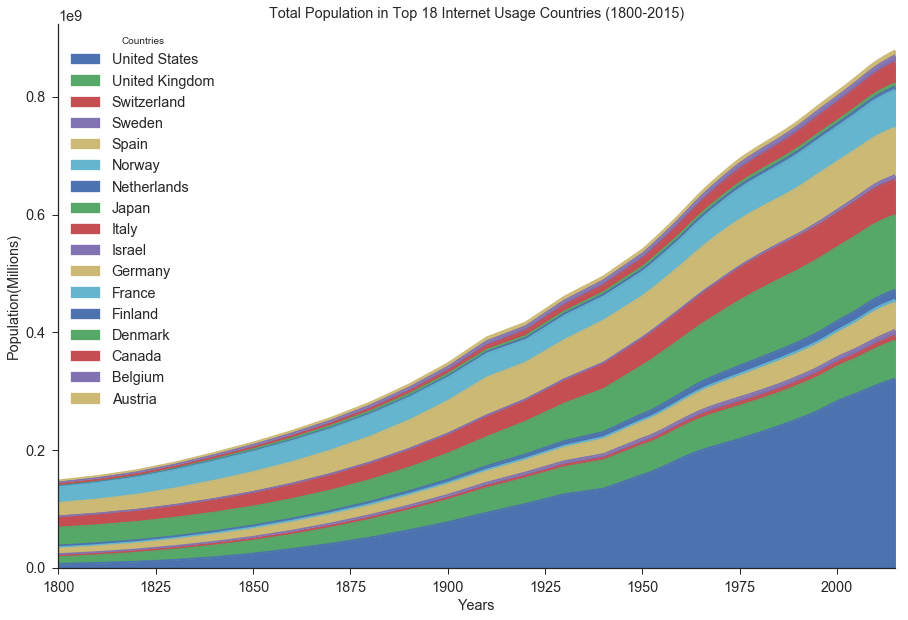

In [274]:
#Area plot to compare general population trends with internet usage trends for Group A
fc_gpop_plt = fc_gpop.plot(kind ='area', title = 'Total Population in Top 18 Internet Usage Countries (1800-2015)')
fc_gpop_plt.set_xlabel('Years')
fc_gpop_plt.set_ylabel('Population(Millions)')

Looking at global population for the group with the most internet users, we see a similar trend in population growth where population is growing steadily and starting to taper off. 

In [270]:
#Filtered DataFrame of countries from Group B of internet usage dataset
md_gpop = global_pop.filter(items=['China', 'India', 'Brazil', 'Russia', 
                        'Nigeria', 'Mexico', 'Pakistan', 'Turkey', 
                        'Vietnam', 'Poland', 'Indonesia', 'Philippines',
                        'Egypt', 'Ukraine', 'Australia', 'Colombia',
                        'Malaysia', 'Morocco', 'Thailand', 'Argentina'])
md_gpop.head()

Countries,China,India,Brazil,Russia,Nigeria,Mexico,Pakistan,Turkey,Vietnam,Poland,Indonesia,Philippines,Egypt,Ukraine,Australia,Colombia,Malaysia,Morocco,Thailand,Argentina
1800,321675013.000,168574895.000,3639636.000,31088398.000,12100855.000,6181708.000,13123633.000,9773456.000,6551000.000,9508747.000,16108545.000,1894389.000,4243515.000,11215490.000,351014.000,1206000.000,287000.000,2503218.000,4665000.000,534000.000
1810,350542958.000,171940819.000,4058652.000,31088398.000,12100855.000,6382317.000,13385672.000,9923007.000,6551000.000,9960687.000,16537268.000,1894389.000,4218711.000,11215490.000,342440.000,1206000.000,287000.000,2595056.000,4665000.000,534000.000
1820,380055273.000,176225709.000,4582325.000,31861526.000,12238319.000,6621314.000,13699962.000,10118315.000,6719340.000,10508375.000,17236636.000,1983383.000,4318788.000,11496004.000,334002.000,1266351.000,303530.000,2713079.000,4712187.000,570719.000
1830,402373519.000,182214537.000,5301068.000,34134430.000,12633330.000,6930661.000,14110059.000,10398375.000,7214925.000,11232857.000,18460171.000,2254767.000,4662153.000,12320877.000,348143.000,1451312.000,354816.000,2880355.000,4847494.000,686703.000
1840,411213424.000,189298397.000,6206694.000,37420913.000,13184823.000,7288858.000,14581666.000,10731241.000,7933037.000,12090161.000,20052305.000,2669713.000,5172331.000,13514033.000,434095.000,1736274.000,435313.000,3082721.000,5035786.000,873747.000


Text(0,0.5,'Population (Millions)')

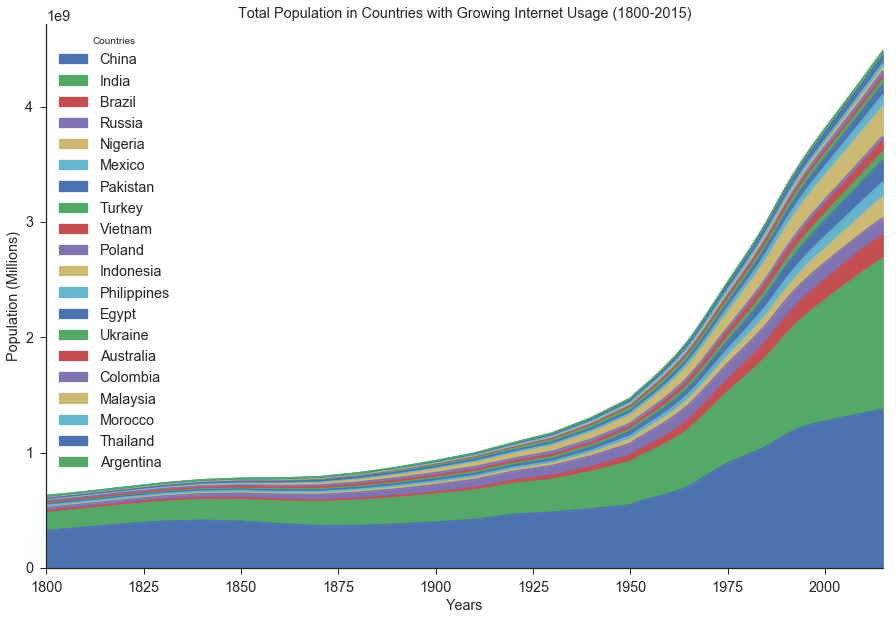

In [280]:
#Area plot to compare general population trends with internet usage trends of Group B
md_gpop_plt = md_gpop.plot(kind='area', title = 'Total Population in Countries with Growing Internet Usage (1800-2015)')
md_gpop_plt.set_xlabel('Years')
md_gpop_plt.set_ylabel('Population (Millions)')

Looking at population growth of the second group, we see that similar to number of internet users, population growth is also on an exponential curve.

# Conclusions: 

The top 5 finding from this analysis were the following: 

1. The countries with internet users recorded from 1990-2010 included the United States, United Kingdom, Switzerland, Sweden, Spain, Norway, Netherlands, Korea, Japan, Italy, Israel, Germany, France, Finland, Denmark, Canada, Belgium, and Austria. This group was classified as Group A. 

2. Outside of Group A, the countries with the most internet users were China, India, Brazil, Russia, Nigeria, Mexico, Pakistan, Turkey, Vietnam, Poland, Indonesia, Philippines, Egypt, Ukraine, Australia, Colombia, Malaysia, Morocco, Thailand, and Argentina. This group was classified as Group B. 

3. The growth of internet users in many countries in Group A saw an uptick from roughly 1997-2001. After that, growth began to taper off though the number of users is still growing. 

4. Contrary to Group A, Group B saw an exponential growth in internet users around roughly 2006 and that growth seems to continue to grow. 

5. Looking at general population trends, there seems to be a correlation between the steadier population growth of Group A and its tapering internet usage as well as a correlation of the exponential population growth of Group B and its rapidly growing number of  internet users. This correlation is by no means conclusive but does provide an observation for further analysis. 

Limitations:
1. There were many countries which lacked data completely or had some years where the data was missing. 
2. This data is not normalized for differences in population sizes across countries and so is not a true representation of internet users across countries. 


Further questions:
1. What age range do most internet users fall into for these two groups? 
2. What are the general population growth trends for that specific age range? 